In [4]:
import ee
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWhE16-uhGzwQAq55emVZqSYzz5vaLKCVVLhtPJv_FHlDklzDFvb7Ig

Successfully saved authorization token.


In [154]:
# Define lon and lat of interest
lon0 = -4.37
lat0 = 50.03

# Define time window of interest
start_date = '2019-03-01'
end_date = '2019-10-01'

# Define scale (?)
scale = 1000 # what is this???????

# Get image collections for modis and landsat
def get_data(name,lon,lat):
    # Extract image collection
    cntr = ee.Geometry.Point(lon,lat)
    ic = ee.ImageCollection(name).filterDate(start_date,end_date)
    # Turn into array
    info = ic.getRegion(cntr,scale).getInfo()
    # Turn into dataframe
    header = info[0]
    data = info[1:]
    df = pd.DataFrame(data,columns=header)
    # Convert time to datetime
    df.time = pd.to_datetime(df.time, unit='ms')
    return df

df_modis = get_data('NASA/OCEANDATA/MODIS-Aqua/L3SMI',lon0,lat0)
df_landsat = get_data('LANDSAT/LC08/C01/T1',lon0,lat0)
df_modis

,id,longitude,latitude,time,chlor_a,nflh,poc,Rrs_412,Rrs_443,Rrs_469,Rrs_488,Rrs_531,Rrs_547,Rrs_555,Rrs_645,Rrs_667,Rrs_678,sst
0,A2019060,-4.370304,50.03167,2019-03-01 00:10:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.125000
1,A2019061,-4.370304,50.03167,2019-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2019062,-4.370304,50.03167,2019-03-03 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A2019063,-4.370304,50.03167,2019-03-04 00:45:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2019064,-4.370304,50.03167,2019-03-05 00:20:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,A2019269,-4.370304,50.03167,2019-09-26 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,A2019270,-4.370304,50.03167,2019-09-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.014999
211,A2019271,-4.370304,50.03167,2019-09-28 00:40:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,A2019272,-4.370304,50.03167,2019-09-29 00:20:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


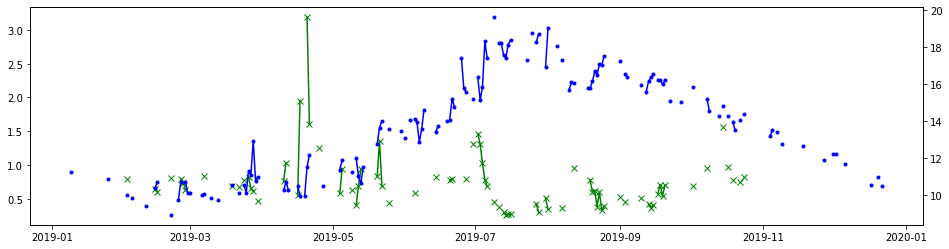

In [6]:
# plot modis time series for sst and chloro
x=df_modis['time']
y1=df_modis['chlor_a']
y2=df_modis['sst']

fig, ax1 = plt.subplots(1,1,figsize=(16,4))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g', marker='x')
ax2.plot(x, y2, 'b', marker='.')


In [155]:
# get multiple pixels
# we know pixels are roughly 5km apart, so choose some rando locations near each other
N = 10
np.random.seed(0)
select = np.random.multivariate_normal([lon0, lat0], 0.01*np.eye(2), N)
print(select)


[[-4.19359477 50.07001572]
 [-4.2721262  50.25408932]
 [-4.1832442  49.93227221]
 [-4.27499116 50.01486428]
 [-4.38032189 50.07105985]
 [-4.35559564 50.17542735]
 [-4.29389623 50.0421675 ]
 [-4.32561368 50.06336743]
 [-4.22059209 50.00948417]
 [-4.33869323 49.94459043]]


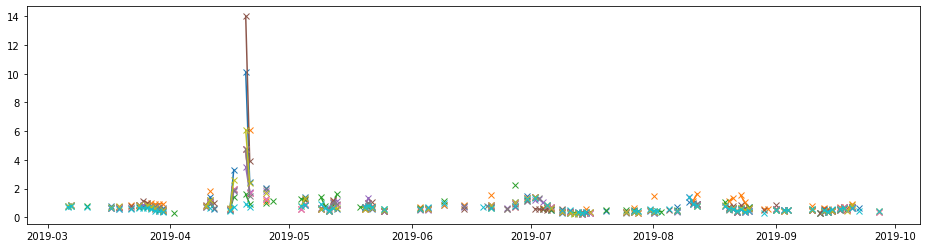

In [156]:

fig, ax1 = plt.subplots(1,1,figsize=(16,4))

chl = np.zeros((N,len(df_modis)))
for i,(lon,lat) in enumerate(select):
    data = get_data('NASA/OCEANDATA/MODIS-Aqua/L3SMI',lon,lat)
    ax1.plot(data.time,data.chlor_a,marker='x')
    chl[i,:] = data['chlor_a']


In [157]:
# # for i in np.arange(365):
# #     for j in arange(N):
# #         if np.isnany[j,i]
# valid = ~np.all(np.isnan(chl), axis=0)
# y = chl[:,valid]
# time = data.time[valid]
y = chl
time = data.time
y

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [158]:
M = 1
A = np.eye(M)
H = np.ones((N, M)) / M
Q = np.eye(M)
R = np.eye(N) * 30 # if you make this lower, you're saying you have more confidence in your measurements. so if =1, filtered result below is pretty much the same as observations
# q and r effectively weight the confidence from model and obs respoectively

In [159]:
Nk = y.shape[1]

m = np.zeros((M, Nk))
P = np.zeros((M, M, Nk))

# Set prior mean and covariance explicitly:
m[:, 0] = np.ones((M))
P[:, :, 0] = Q

mp = m.copy()
Pp = P.copy()

In [160]:
sum(np.isnan(y[:,1]))

10

In [161]:
threshold=80 #% missing data
threshold_n=int(threshold/N)
for k in range(1, Nk):

        
    # 1. Prediction step
    mp[:, k] = A.dot(m[:, k-1])
    Pp[:, :, k] = A.dot(P[:, :, k-1]).dot(A.T) + Q
    
    # If there is more than 80% data, skip update step
    if sum(np.isnan(y[:, k]))>threshold_n:
        m[:, k] = mp[:, k]
        P[:, :, k] = Pp[:, :, k]
        continue
    # If there is any missing data, skip update step
    elif np.isnan(y[:, k]).any():
        xbar = np.nanmean(y[~np.isnan(y[:,k]),k])
        for i,_ in enumerate(y[:,k]):
            if np.isnan(_):
                y[i,k] = xbar
        
    # 2. Update step
    v = y[:, k] - H.dot(mp[:, k])
    S = H.dot(Pp[:, :, k]).dot(H.T) + R
    K = Pp[:, :, k].dot(H.T).dot(np.linalg.inv(S))
    m[:, k] = mp[:, k] + K.dot(v)
    P[:, :, k] = Pp[:, :, k] - K.dot(S).dot(K.T)

In [162]:
y.shape

(10, 214)

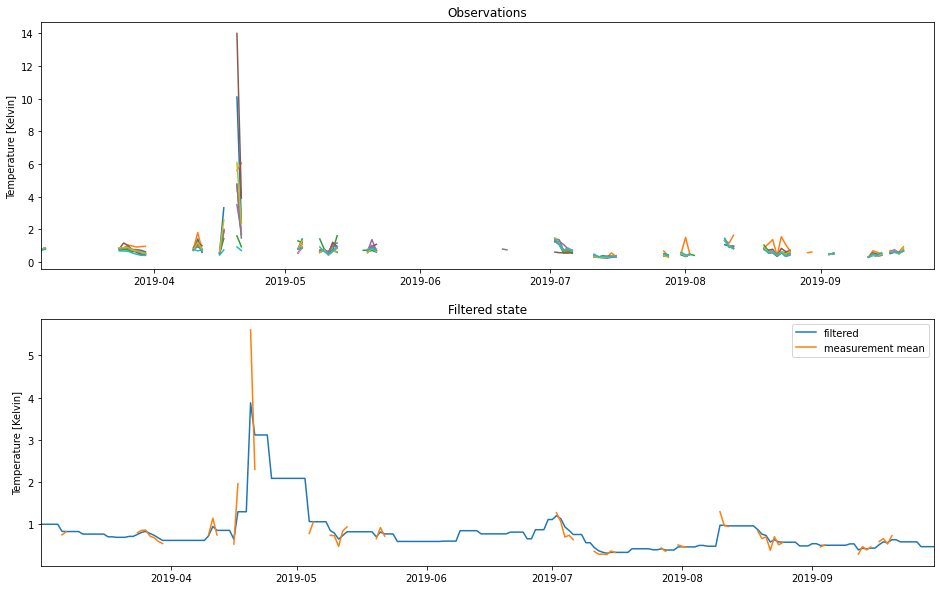

In [163]:
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
ax[0].plot(time, y.T)
ax[0].set_title('Observations')
ax[1].plot(time, m.T,label='filtered')
ax[1].plot(time, y.mean(0),label='measurement mean')
ax[1].legend()
ax[1].set_title('Filtered state')
for a in ax:
    a.set_ylabel('Temperature [Kelvin]')
    a.autoscale(enable=True, axis='x', tight=True)

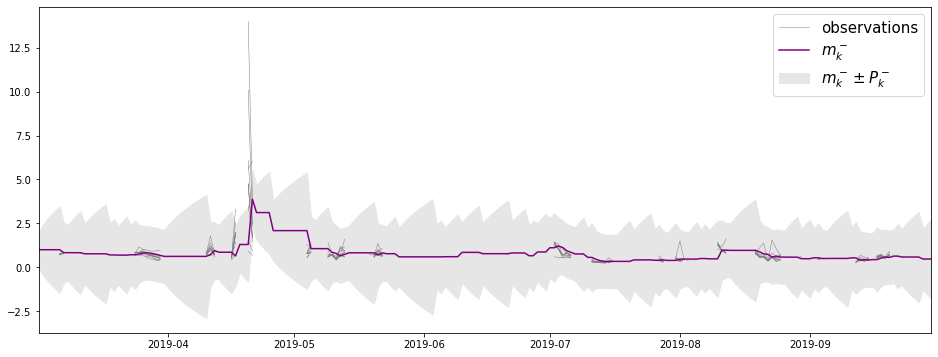

In [164]:
plt.figure(figsize=(16, 6))

# Plot the original observations
h = plt.plot(time, y.T, color='0.5', linewidth=0.5)
# Add legend entry for one of the lines
h[0].set_label('observations')

# Add gray band to indicate covariance
error = np.sqrt((Pp.diagonal(axis1=0, axis2=1)).flatten())
plt.fill_between(time, mp.flatten() - error, mp.flatten() + error, color='0.9', label='$m^-_k \pm P^-_k$')

# Plot predictive means
plt.plot(time, mp.T, color='purple', label='$m^-_k$')

plt.legend(fontsize=15)
plt.autoscale(enable=True, axis='x', tight=True)

In [165]:
ms = m.copy()
Ps = P.copy()

# Add your code here:
for k in range(Nk-2,-1,-1):
    G = P[:,:,k].dot(A.T).dot(np.linalg.inv(Pp[:, :, k+1]))
    ms[:,k] = m[:,k] + G.dot(ms[:,k+1]-mp[:,k+1])
    Ps[:,:,k] = P[:,:,k] + G.dot(Ps[:,:,k+1]-Pp[:,:,k+1]).dot(G.T)

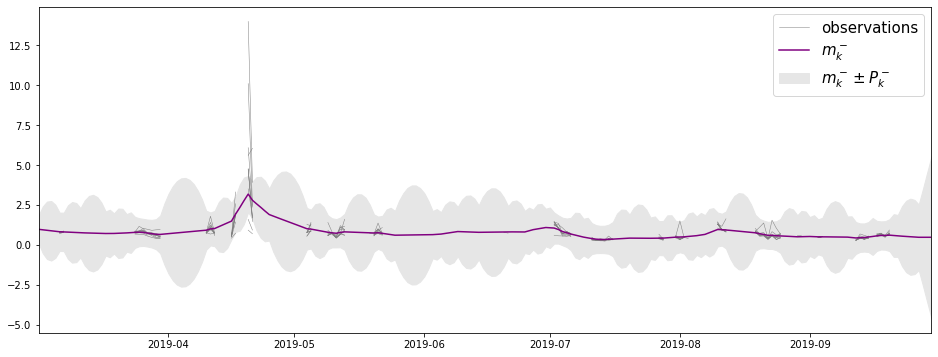

In [167]:
plt.figure(figsize=(16, 6))

# Plot the original observations
h = plt.plot(time, y.T, color='0.5', linewidth=0.5)
# Add legend entry for one of the lines
h[0].set_label('observations')

# Add gray band to indicate covariance
error = (Ps.diagonal(axis1=0, axis2=1)).flatten()
plt.fill_between(time, ms.flatten() - error, ms.flatten() + error, color='0.9', label='$m^-_k \pm P^-_k$')

# Plot predictive means
plt.plot(time, ms.T, color='purple', label='$m^-_k$')

plt.legend(fontsize=15)
plt.autoscale(enable=True, axis='x', tight=True)

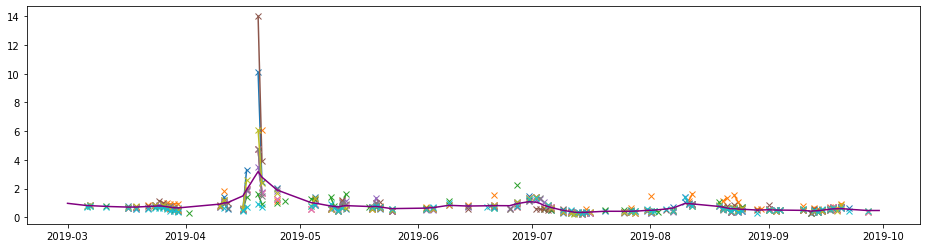

In [168]:

fig, ax1 = plt.subplots(1,1,figsize=(16,4))

chl = np.zeros((N,len(df_modis)))
for i,(lon,lat) in enumerate(select):
    data = get_data('NASA/OCEANDATA/MODIS-Aqua/L3SMI',lon,lat)
    ax1.plot(data.time,data.chlor_a,marker='x')
    chl[i,:] = data['chlor_a']
ax1.plot(time, ms.T, color='purple', label='$m^-_k$')


In [164]:

mds = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').select(['chlor_a']).filterDate(start_date, end_date);

area = cntr.buffer(5000)
chl_box = mds.getRegion(area,scale).getInfo()
chl_box
# import wxee

# wxee.Initialize()
# xr_modis = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').filterDate('2020-03-01', '2020-09-01').wx.to_xarray();
# xr_modis

Exception ignored in: <function tqdm.__del__ at 0x0000029403903670>
Traceback (most recent call last):
  File "C:\Users\eejco\Anaconda3\envs\ee\lib\site-packages\tqdm\std.py", line 1147, in __del__
    self.close()
  File "C:\Users\eejco\Anaconda3\envs\ee\lib\site-packages\tqdm\notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000029403903670>
Traceback (most recent call last):
  File "C:\Users\eejco\Anaconda3\envs\ee\lib\site-packages\tqdm\std.py", line 1147, in __del__
    self.close()
  File "C:\Users\eejco\Anaconda3\envs\ee\lib\site-packages\tqdm\notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


[['id', 'longitude', 'latitude', 'time', 'chlor_a'],
 ['A2010001', -4.379287010082668, 49.98675398483078, 1262305501000, None],
 ['A2010002', -4.379287010082668, 49.98675398483078, 1262391001000, None],
 ['A2010003', -4.379287010082668, 49.98675398483078, 1262477700000, None],
 ['A2010004', -4.379287010082668, 49.98675398483078, 1262563201000, None],
 ['A2010005', -4.379287010082668, 49.98675398483078, 1262649601000, None],
 ['A2010006', -4.379287010082668, 49.98675398483078, 1262738700000, None],
 ['A2010007', -4.379287010082668, 49.98675398483078, 1262823901000, None],
 ['A2010008', -4.379287010082668, 49.98675398483078, 1262910900000, None],
 ['A2010009', -4.379287010082668, 49.98675398483078, 1262996100000, None],
 ['A2010010', -4.379287010082668, 49.98675398483078, 1263082801000, None],
 ['A2010011', -4.379287010082668, 49.98675398483078, 1263168301000, None],
 ['A2010012', -4.379287010082668, 49.98675398483078, 1263255001000, None],
 ['A2010013', -4.379287010082668, 49.9867539848

In [156]:
import folium
import geehydro

# extract ic for just june
mds_jun = ee.ImageCollection('NASA/OCEANDATA/MODIS-Aqua/L3SMI').filterDate('2020-06-01', '2020-06-30');
lds_jun = ee.ImageCollection('LANDSAT/LC08/C01/T1').filterDate('2020-06-01', '2020-06-30');

mosaic = ic_jun.mosaic()

# Use folium to visualize the imagery.
map = folium.Map(location=[lat,lon],zoom_start=9) #latitude, longitude
#map.setOptions('HYBRID') # To see GE map underneath

map.addLayer(mosaic, {'min': -0.01, 'max': 0.01, 'bands':['Rrs_645', 'Rrs_555', 'Rrs_443']}, 'mosaic')
# map.addLayer(mosaic, {'min': 0, 'max': 5, 'bands':['chlor_a']}, 'chlor')
# map.addLayer(mosaic, {'min': 10, 'max': 30, 'bands':['sst']}, 'sst')
# map.addLayer(mosaic, {'min': 0, 'max': 500, 'bands':['poc']}, 'poc')

map

In [157]:
# Use folium to visualize the imagery.
map2 = folium.Map(location=[lat,lon],zoom_start=9) #latitude, longitude
map2.addLayer(lds_jun.mosaic(), {'min':5000, 'max': 15000, 'bands':['B4', 'B3', 'B2']}, 'mosaic')

map2

In [104]:
info = ic_jun.getInfo()
print(ic_jun)

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.filter",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "ImageCollection.load",
          "arguments": {
            "id": {
              "constantValue": "NASA/OCEANDATA/MODIS-Aqua/L3SMI"
            }
          }
        }
      },
      "filter": {
        "functionInvocationValue": {
          "functionName": "Filter.dateRangeContains",
          "arguments": {
            "leftValue": {
              "functionInvocationValue": {
                "functionName": "DateRange",
                "arguments": {
                  "end": {
                    "constantValue": "2020-06-30"
                  },
                  "start": {
                    "constantValue": "2020-06-01"
                  }
                }
              }
            },
            "rightField": {
              "constantValue": "system:time_start"
            }
     

,id,longitude,latitude,time,chlor_a,sst
0,A2020063,-4.289455,49.798108,1583194201000,None,10.155
1,A2020067,-4.289455,49.798108,1583540401000,None,9.61
2,A2020068,-4.289455,49.798108,1583627401000,None,9.97
3,A2020072,-4.289455,49.798108,1583971501000,None,10.22
4,A2020076,-4.289455,49.798108,1584317700000,0.649804,10.7
...,...,...,...,...,...,...
40122,A2020231,-4.226573,49.968788,1597709101000,None,19.190001
40123,A2020238,-4.226573,49.968788,1598314201000,2.203236,16.379999
40124,A2020240,-4.226573,49.968788,1598496100000,1.092547,None
40125,A2020242,-4.226573,49.968788,1598668500000,2.183333,16.605


In [20]:
df = df.to_xarray()
df

<xarray.Dataset>
Dimensions:    (index: 40127)
Coordinates:
  * index      (index) int64 0 1 2 3 4 5 ... 40121 40122 40123 40124 40125 40126
Data variables:
    id         (index) object 'A2020063' 'A2020067' ... 'A2020242' 'A2020243'
    longitude  (index) object -4.289 -4.289 -4.289 ... -4.227 -4.227 -4.227
    latitude   (index) object 49.8 49.8 49.8 49.8 ... 49.97 49.97 49.97 49.97
    time       (index) object 1583194201000 1583540401000 ... 1598747400000
    chlor_a    (index) object None None None None ... 2.203 1.093 2.183 1.579
    sst        (index) object 10.15 9.61 9.97 10.22 ... 16.38 None 16.6 None

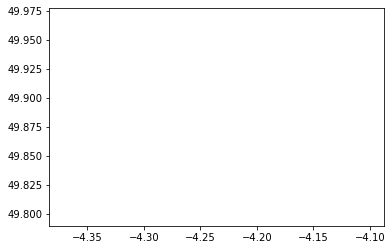

In [24]:
fig,ax = plt.subplots()
ax.scatter(df.longitude,df.latitude,0,df.sst)

In [ ]:
df=df_chl_box.set_index(['time','latitude','longitude'])
ds=xr.Dataset.from_dataframe(df)

# # row data to be gridded
# data = {"lat": [0, 0, 2], "lon": [1, 2, 0], "time": [0, 1, 2], "values": [20, 50, 30]}
# df_rows = pd.DataFrame(data).set_index(["time", "lon", "lat"])

#ds = xr.Dataset.from_dataframe(df_rows)
ds

In [95]:
# df.sst[df.indexes.time==1452299401000]
df.index.time

AttributeError: 'MultiIndex' object has no attribute 'time'

In [81]:
sst=ds['sst'].values
type(sst) != np.na

True

In [65]:
xarrtst['sst'].isel(time=0).plot()

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

In [14]:
lon=df_chl_box['longitude'].unique()
lat=df_chl_box['latitude'].unique()
time=df_chl_box['time'].unique()

array([-64.0094555699365, -64.00047241709531, -63.99148926425411],
      dtype=object)